<a href="https://colab.research.google.com/github/khushi4124/Breast-Cancer-Detection/blob/main/breast_cancer_detection_svm_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/breast-cancer-data.csv")

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

EXPLORATORY DATA ANALYSIS

In [ ]:
#since, we don't need id and Unnamed: 32, we're going to drop the columns
df = df.drop(columns=['id','Unnamed: 32'])

In [ ]:
#verifying if the columns were dropped from the dataframe
len(df.columns)

31

In [ ]:
#checking for any null values
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


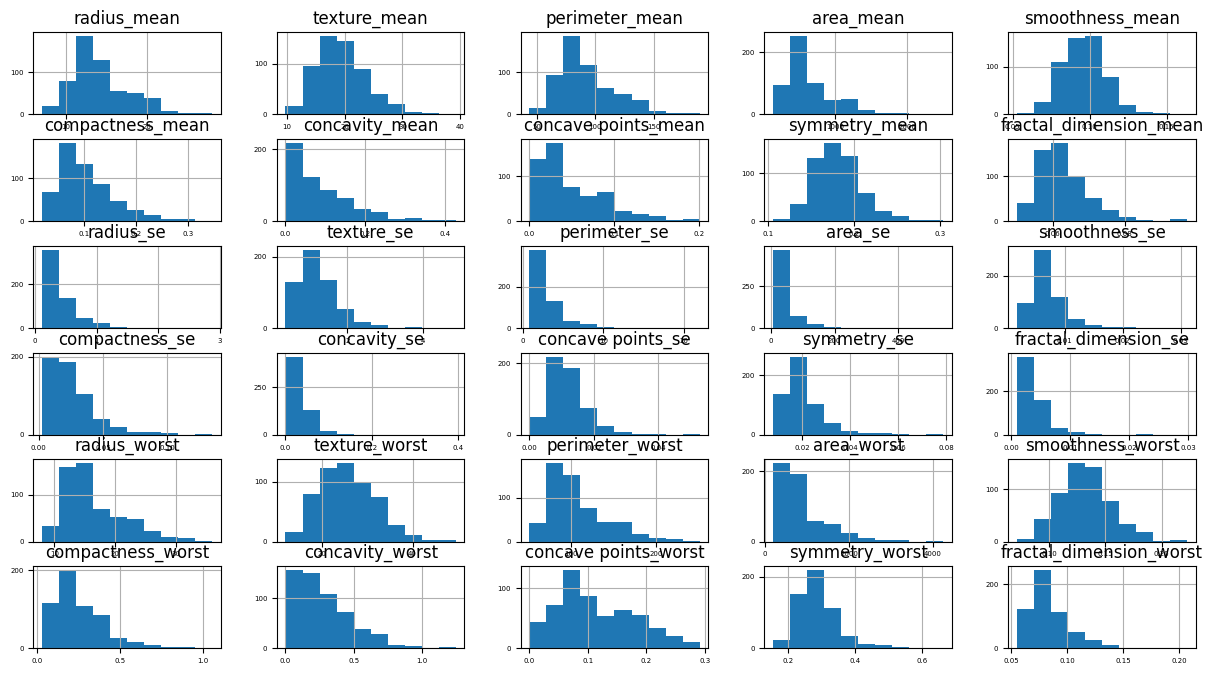

In [ ]:
df.hist(xlabelsize=5,ylabelsize=5,figsize=(15,8));

In [ ]:
#finding the skewness of features
columns = df.columns
for col in list(columns):
  if(col=='diagnosis'):
    continue
  print(f"The skewness of {col} is {df[col].skew()}")

The skewness of radius_mean is 0.9423795716730992
The skewness of texture_mean is 0.6504495420828159
The skewness of perimeter_mean is 0.9906504253930081
The skewness of area_mean is 1.6457321756240424
The skewness of smoothness_mean is 0.45632376481955844
The skewness of compactness_mean is 1.1901230311980404
The skewness of concavity_mean is 1.4011797389486722
The skewness of concave points_mean is 1.1711800812336282
The skewness of symmetry_mean is 0.7256089733641999
The skewness of fractal_dimension_mean is 1.3044888125755076
The skewness of radius_se is 3.0886121663847574
The skewness of texture_se is 1.646443808753053
The skewness of perimeter_se is 3.443615202194899
The skewness of area_se is 5.447186284898394
The skewness of smoothness_se is 2.314450056636759
The skewness of compactness_se is 1.9022207096378565
The skewness of concavity_se is 5.110463049043661
The skewness of concave points_se is 1.4446781446974786
The skewness of symmetry_se is 2.1951328995478216
The skewness 

In [ ]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


MODEL BUILDING

In [ ]:
X = df.drop(columns=['diagnosis'])

In [ ]:
X.shape

(569, 30)

In [ ]:
y = df['diagnosis']

In [ ]:
y.shape

(569,)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [ ]:
svc_breast_cancer_classifier = Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svm", SVC(kernel='linear',C=1))
])

In [ ]:
svc_breast_cancer_classifier.fit(X_train,y_train_label)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svm', SVC(C=1, kernel='linear'))])

In [ ]:
print(f"The accuracy on the train data is {svc_breast_cancer_classifier.score(X_train,y_train_label)*100:.2f}")

The accuracy on the train data is 98.68


In [ ]:
svc_breast_cancer_classifier.fit(X_test,y_test_label)
print(f"The accuracy on the test data is {svc_breast_cancer_classifier.score(X_test,y_test_label)*100:.2f}")

The accuracy on the test data is 99.12


In [ ]:
from sklearn.model_selection import cross_val_score

# Run 5-fold Cross-Validation
scores = cross_val_score(svc_breast_cancer_classifier, X, y, cv=5)

print(f"All Scores: {scores}")
print(f"Mean Accuracy: {scores.mean() * 100:.2f}%")
print(f"Standard Deviation: {scores.std():.4f}")

All Scores: [0.96491228 0.98245614 0.96491228 0.96491228 0.98230088]
Mean Accuracy: 97.19%
Standard Deviation: 0.0086


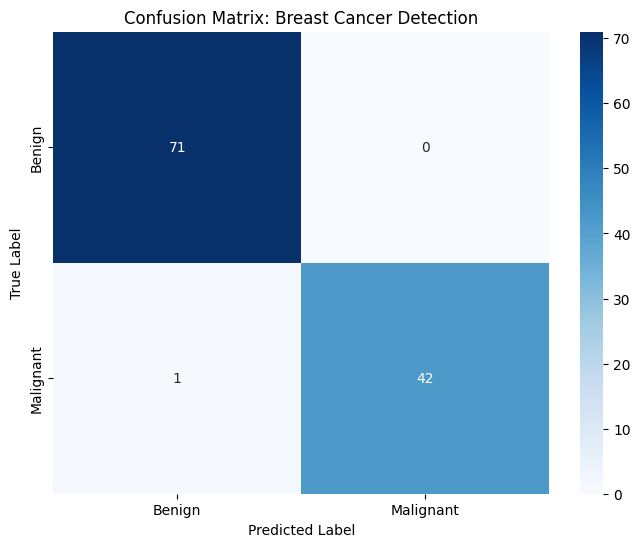

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = svc_breast_cancer_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Breast Cancer Detection')
plt.show()